In [274]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
sns.set_context("talk")

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\15427\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [276]:
#loading data
df = pd.read_csv("cleaned.csv").iloc[:,1:].drop(columns=["kills","deaths"])
df = pd.get_dummies(df)


In [277]:
dataset.head()

,datacompleteness,side,teamname,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,...,towers,opp_towers,damagetochampions,dpm,damagetakenperminute,totalgold,earnedgold,earned gpm,goldspent,gspd
0,complete,Blue,JD Gaming,1786,1,24,14,64,24,14,...,9.0,2.0,66630.0,2238.4099,2817.0101,60517,40922.0,1374.7592,54700.0,0.149143
1,complete,Red,JD Gaming,2213,1,18,11,48,18,11,...,9.0,4.0,79332.0,2150.8902,2628.0976,70689,46738.0,1267.1848,64135.0,0.063297
2,complete,Blue,JD Gaming,2080,1,15,15,36,15,15,...,10.0,4.0,92313.0,2662.8750,2553.9519,64503,41909.0,1208.9135,55725.0,-0.076790
3,complete,Red,JD Gaming,1504,1,17,6,28,17,6,...,11.0,1.0,74476.0,2971.1170,2823.5904,55898,39179.0,1562.9920,47585.0,0.252411
4,complete,Red,JD Gaming,1692,1,17,10,38,17,10,...,10.0,2.0,75775.0,2687.0567,2952.3404,60278,41642.0,1476.6667,50450.0,0.095861


In [278]:
#cleaning data 

y = df["result"]
colum=["result","datacompleteness","side","teamname","gamelength","deaths","teamkills","team kpm","ckpm","elders","opp_elders","firstherald","assists","teamdeaths","firstblood","heralds","opp_heralds","firstbaron","barons","opp_barons","dpm","damagetakenperminute","totalgold","earned gpm","goldspent","earnedgold","gspd","firsttower","opp_towers","damagetochampions"]
X = dataset.drop(columns=colum)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y)
y_train

507     1
989     1
189     1
99      1
593     1
       ..
319     1
1149    0
840     1
1151    1
120     1
Name: result, Length: 874, dtype: int64

In [279]:
#making a clf model 
clf = svm.SVC(kernel="linear",random_state=32)
clf.fit(X_train, y_train)
clf.support_vectors_
print(clf.decision_function(X_train))
print(clf.fit(X,y))


[ 3.68826395  3.34359164  1.55129559  2.51637808  2.654247    2.99891932
 -3.48092022  4.86014983 -2.86051005 -2.79157559  3.34359164  2.72318147
 -4.10133039  2.92998486  2.30957469  2.17170576  2.51637808 -4.58387163
  1.48236113 -5.13534734 -2.99837898 -4.03239593  2.24064022 -3.96346146
 -3.20518237  2.51637808  3.82613288  1.55129559  3.55039503  0.7930165
  1.68916452 -4.37706824  0.65514757 -3.68772361  0.86195096  1.62023006
  2.24064022 -4.23919932 -3.894527    3.75719841  4.10187073  2.30957469
  2.654247    2.44744361 -5.41108519  2.99891932 -3.82559254 -4.30813378
 -3.894527    1.48236113 -4.44600271  2.99891932  2.24064022  1.62023006
  2.51637808 -4.6528061   3.82613288  4.30867412 -3.68772361 -1.89542757
  2.72318147  0.65514757 -2.51583774  1.89596791  1.41342667  5.06695322
 -1.2750174   3.4125261   4.58441197  2.1027713   1.27555774 -0.37886938
  2.17170576  2.17170576  2.58531254  1.41342667  1.06875435 -2.86051005
 -3.54985468  4.44654305  3.20572271  3.27465717  3.

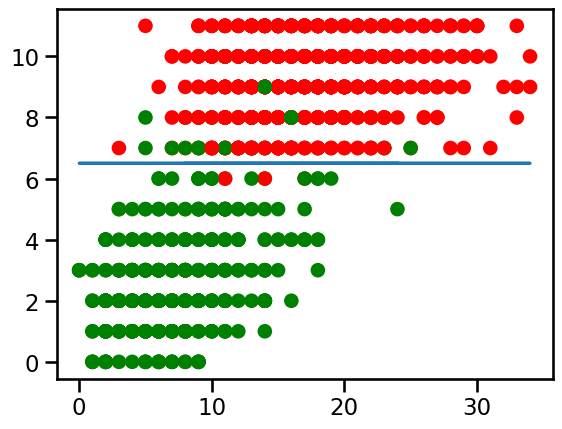

In [280]:
#plotting the final plot

clrs= ['red' if cls ==1 else 'green' for cls in y]
A =clf.coef_
a=A[0,:1]
b=A[0,1]
c=clf.intercept_[0]
m=a/(0-b)
inter=c/(0-b)
line=m*X["kills"]+inter+0.5
line2=m*X["towers"]+inter
plt.scatter(X["kills"],X["towers"],c=clrs,cmap="viridis")
plt.plot(X["kills"],line)
